# Steel Data Team: King County Housing Market Analysis

## Introduction

The goal of this notebook is to inform KC Real Estate, a real estate developer in the Seattle area about what factors of a home have the greatest effects on the value.  We will be using data from the King County website.

## Business Understanding

__Stakeholder:__  KC Real Estate

__Problem:__  Our Stakeholder needs us to tell them how to make decisions regarding new real estate development projects.  They 
              want to build houses that have qualities that lead to maximum value.

__Subproblem:__ Houses have numerous features so it is dfficult to narrow down which exact features result in higher priced homes.

__Assumptions:__ 
- The size of a house has a positive linear relationship with price.

- The better the condition of a house is, the more valuable it will be.


## Data Understanding

There is 1 csv file that we are getting our data from.  In this section we will explore the data and learn the size and shape of our dataset.  We will also gain an understanding of the housing features presented in this dataset.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
# read CSV file
df=pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Our dataset has 21597 records and 21 columns
- we have 3 columns with missing values

In [5]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [6]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='Count'>

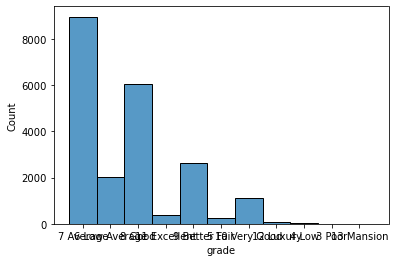

In [7]:
sns.histplot(df['grade'])

In [8]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Note that the mean for 'bedrooms' 3.37 and the max for bedrooms is 33.  This is an easy outlier to spot. 

C:\Users\wharr\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

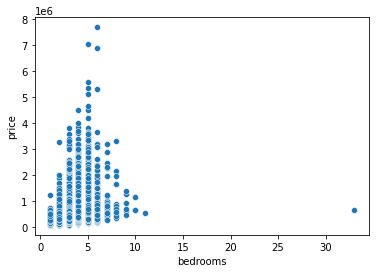

In [9]:
# look for outliers
sns.scatterplot(df['bedrooms'],df['price'])


In [10]:
# look for the specifics of that outlier
df.loc[df['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
15856      6000     1.0         NO  NONE  ...  7 Average       1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

The house with 33 bedrooms only costs $640,000.  Also this house has 1.75 bathrooms.  This record holds an outlier and the rest of the features do not add up.  We will drop this outlier from our dataset.

In [11]:
# we will drop this outlier by using the record index.
df=df.drop(15856)

Check to see if we dropped the right record.

In [12]:
df.describe()


id         price      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.402920e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.673760e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  17754.000000   
mean   1.509983e+04      1.494119   1788.631506   1971.000787     83.641489   
std    4.141355e+04      0.539685    827.763251     29.375460    399.957185   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.619000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068550e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21596.000000  21596.000000  21596.000000   21596.000000   21596.000000  
mean   98077.950685     47.560087   -122.213977    1986.650722   12758.656649  
std       53.514040      0.138552      0.140725     685.231768   27275.018316  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

we can confirm that we dropped the right record because max bedrooms is now 11.

#### Lets check the correlation between one of our features and 'price'

C:\Users\wharr\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

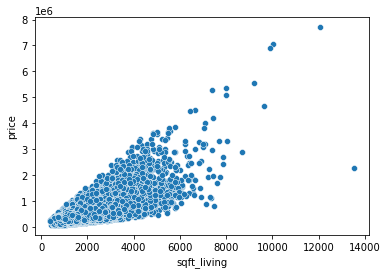

In [13]:
sns.scatterplot(df['sqft_living'],df['price'])

In [14]:
# look for the outlier on the far right
df.loc[df['sqft_living']== 13540].T

12764
id             1225069038
date             5/5/2014
price            2.28e+06
bedrooms                7
bathrooms               8
sqft_living         13540
sqft_lot           307752
floors                  3
waterfront             NO
view            EXCELLENT
condition         Average
grade           12 Luxury
sqft_above           9410
sqft_basement      4130.0
yr_built             1999
yr_renovated            0
zipcode             98053
lat               47.6675
long             -121.986
sqft_living15        4850
sqft_lot15         217800

This is a huge outlier in regards to 'sqft_living', so we are going to drop it.

In [15]:
# We again drop this record by using the record the index
df.drop(12764, inplace=True)

In [16]:
# Confirm that the record(12764) has been dropped from our dataframe.
df[12763:12766]

id       date     price  bedrooms  bathrooms  sqft_living  \
12763  7228500610  3/30/2015  510000.0         2        1.0         1070   
12765  5162100650  9/22/2014  316000.0         4        2.5         2320   
12766  3904902510  5/12/2014  690000.0         4        2.5         2670   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
12763      5280     1.0         NO  NONE  ...  6 Low Average       1070   
12765      7379     2.0         NO  NONE  ...         8 Good       2320   
12766     13463     2.0         NO  NONE  ...       9 Better       2670   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12763            0.0     1900           NaN    98122  47.6168 -122.303   
12765            0.0     1987           0.0    98003  47.3432 -122.316   
12766              ?     1989           0.0    98029  47.5627 -122.018   

       sqft_living15  sqft_lot15  
12763           1380        2370  
12765           2230        7614  
12766           2560       10982  

[3 rows x 21 columns]

In [17]:
# check the one with the highest price
df.loc[df['price'] == df['price'].max()].T
# this one makes sense and it also look like it's following the trend

7245
id             6762700020
date           10/13/2014
price             7.7e+06
bedrooms                6
bathrooms               8
sqft_living         12050
sqft_lot            27600
floors                2.5
waterfront             NO
view                 GOOD
condition            Good
grade          13 Mansion
sqft_above           8570
sqft_basement      3480.0
yr_built             1910
yr_renovated         1987
zipcode             98102
lat               47.6298
long             -122.323
sqft_living15        3940
sqft_lot15           8800

__Understanding of some of the more complicated features__

- View: The quality of the view of Washington landmarks such as the Cascades, Olympics, etc

- sqft_living15: The average living space in square footage of the nearest 15 neighbors

- sqft_lot15: Tells us the average lot size of the nearest 15 neighbors

- Grade: Tells us the construction and design of a house


## Data Cleaning

In [18]:
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      316
Name: view, dtype: int64

In [19]:
# See how many null values are in this column
df['view'].isna().sum()

63

In [20]:
#check to see where the houses with null values in view columns are
fig_null_view = px.scatter_mapbox(df[df['view'].isna()== True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_null_view.update_layout(mapbox_style='open-street-map')
fig_null_view.show()

- Most of these houses looks far away from the scenic spots like Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
- So we are going to fill in null values with NONE

In [21]:
# fill in the null values with None, assuming sometimes people don't fill it in when there's minimum view
df['view'] = df['view'].fillna('NONE')

In [22]:
# check our work
df['view'].isna().sum()

0

##### Convert categoricals into int or float values

the view column has categorical data.  We can easily convert this into numeric data with dictionary mapping.

In [23]:
# Map our string values to numeric values
view_dict = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_dict, inplace=True)

In [24]:
# check to see if there's null values in the column
df['condition'].isna().sum()

0

In [25]:
df['condition'].value_counts()

Average      14019
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [26]:
# # Create dictionary for mapping onto condition
cond_dict = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}

In [27]:
# Replace categorical values with numeric values
df['condition'].replace(cond_dict, inplace=True)

In [28]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          88
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8973
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

In [29]:
# mapped dicitonary to change grade to numeric values
grade_dict = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}
df['grade'].replace(grade_dict, inplace=True)

In [30]:
df['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [31]:
df['waterfront'].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

In [32]:
df['waterfront'].isna().sum()

2376

In [33]:
# look at where the houses with missing values in the waterfront column are
fig_waterfront = px.scatter_mapbox(df[df['waterfront'].isna()==True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront.update_layout(mapbox_style='open-street-map')
fig_waterfront.show()

In [34]:
# look at where the houses with YES in the waterfront column are
fig_waterfront_y = px.scatter_mapbox(df[df['waterfront']=='YES'],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront_y.update_layout(mapbox_style='open-street-map')
fig_waterfront_y.show()

The id column does not relate to anything in our analysis so we can drop that column

In [35]:
df.drop('id', axis=1, inplace=True)

In [36]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0        NaN     1          3      7        1180           0.0      1955   
1         NO     1          3      7        2170         400.0      1951   
2         NO     1          3      6         770           0.0      1933   
3         NO     1          5      7        1050         910.0      1965   
4         NO     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

### Visualize home prices to see if there's a pattern

In [37]:
loc_df = df[['lat', 'long', 'price']]

In [38]:
fig = px.scatter_mapbox(loc_df[loc_df['price'] < 2000000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

It seems that the most expensive houses are concentrated around Bellevue, which has a central coordinate of 47.6101° N, 122.2015° W.  Use distance formula to make add a new column for distance from Bellevue.

In [39]:
# Add a distance column to indicate distance from the central point of Bellevue 
df['distance'] = np.sqrt((df['lat']-47.6101)**2 + (df['long'] + 122.2015)**2)

In [40]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ...  sqft_above  sqft_basement yr_built  \
0        NaN     1          3  ...        1180            0.0     1955   
1         NO     1          3  ...        2170          400.0     1951   
2         NO     1          3  ...         770            0.0     1933   
3         NO     1          5  ...        1050          910.0     1965   
4         NO     1          3  ...        1680            0.0     1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           NaN    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   distance  
0  0.113408  
1  0.161571  
2  0.131625  
3  0.211298  
4  0.156643  

[5 rows x 21 columns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21595 non-null  object 
 1   price          21595 non-null  float64
 2   bedrooms       21595 non-null  int64  
 3   bathrooms      21595 non-null  float64
 4   sqft_living    21595 non-null  int64  
 5   sqft_lot       21595 non-null  int64  
 6   floors         21595 non-null  float64
 7   waterfront     19219 non-null  object 
 8   view           21595 non-null  int64  
 9   condition      21595 non-null  int64  
 10  grade          21595 non-null  int64  
 11  sqft_above     21595 non-null  int64  
 12  sqft_basement  21595 non-null  object 
 13  yr_built       21595 non-null  int64  
 14  yr_renovated   17753 non-null  float64
 15  zipcode        21595 non-null  int64  
 16  lat            21595 non-null  float64
 17  long           21595 non-null  float64
 18  sqft_l

##### Test Train Split

Split our data set into a training set and a test set

In [41]:
X = df.drop('price', axis=1)
y= df['price']

We are using 1/4 of the data for testing and 3/4 for training

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2358    3/25/2015         3       1.00         1040      8122     1.0   
6405     3/4/2015         3       2.50         1880      4499     2.0   
937     10/7/2014         3       2.50         2020      6564     1.0   
19076   1/16/2015         5       4.00         4720    493534     2.0   
18799   6/18/2014         4       2.25         2190      4080     2.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21577   3/17/2015         5       3.75         4170      8142     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15796  12/20/2014         5       2.00         1430      5600     1.5   

      waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
2358          NO     1          5      7        1040           0.0      1971   
6405          NO     1          3      8        1880           0.0      1993   
937           NO     1          3      7        1310         710.0      1994   
19076         NO     1          5      9        3960         760.0      1975   
18799         NO     1          3      8        1800         390.0      1918   
...          ...   ...        ...    ...         ...           ...       ...   
11964         NO     1          3      7        2230           0.0      2004   
21577         NO     3          3     10        4170           0.0      2006   
5390          NO     1          4      6        1530           0.0      1976   
860           NO     1          3      5         380           0.0      1963   
15796         NO     1          3      6        1430           0.0      1947   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
2358            0.0    98198  47.3731 -122.312           1470        8676   
6405            0.0    98029  47.5664 -121.999           2130        5114   
937             0.0    98042  47.3545 -122.158           1710        5151   
19076           0.0    98027  47.4536 -122.009           2160      219542   
18799           0.0    98119  47.6425 -122.358           2100        4080   
...             ...      ...      ...      ...            ...         ...   
11964           0.0    98065  47.5308 -121.847           2230        6088   
21577           NaN    98056  47.5354 -122.181           3030        7980   
5390            0.0    98014  47.6492 -121.908           1520        8500   
860             0.0    98168  47.4810 -122.323           1170       15000   
15796           NaN    98118  47.5192 -122.266           1860        5980   

       distance  
2358   0.261494  
6405   0.207162  
937    0.259275  
19076  0.248090  
18799  0.159819  
...         ...  
11964  0.363261  
21577  0.077462  
5390   0.296093  
860    0.177282  
15796  0.111459  

[16196 rows x 20 columns]

## Modeling

### Baseline Model

In [44]:
base_train_mean = y_train.mean()
base_train_mean

543303.2574709805

In [45]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [46]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.001164501892552794
----
Train RMSE: 368714.2955544344
Test RMSE: 362612.29141276295


Interpretation: The baseline model predicts that every house has the value of the mean in this area. The model has very low R2 (close to zero) and the prediction is off by 362 thousand dollars on average.

### Explore Independent Variables

In [47]:
# make a dataframe for our training data
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

price        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
2358    234000.0   3/25/2015         3       1.00         1040      8122   
6405    529000.0    3/4/2015         3       2.50         1880      4499   
937     253000.0   10/7/2014         3       2.50         2020      6564   
19076   745000.0   1/16/2015         5       4.00         4720    493534   
18799   855000.0   6/18/2014         4       2.25         2190      4080   
...          ...         ...       ...        ...          ...       ...   
11964   440000.0   9/15/2014         3       2.50         2230      5800   
21577  1090000.0   3/17/2015         5       3.75         4170      8142   
5390    299800.0   7/21/2014         4       1.50         1530      9000   
860     245000.0   6/20/2014         1       0.75          380     15000   
15796   133000.0  12/20/2014         5       2.00         1430      5600   

       floors waterfront  view  condition  ...  sqft_above  sqft_basement  \
2358      1.0         NO     1          5  ...        1040            0.0   
6405      2.0         NO     1          3  ...        1880            0.0   
937       1.0         NO     1          3  ...        1310          710.0   
19076     2.0         NO     1          5  ...        3960          760.0   
18799     2.0         NO     1          3  ...        1800          390.0   
...       ...        ...   ...        ...  ...         ...            ...   
11964     2.0         NO     1          3  ...        2230            0.0   
21577     2.0         NO     3          3  ...        4170            0.0   
5390      1.0         NO     1          4  ...        1530            0.0   
860       1.0         NO     1          3  ...         380            0.0   
15796     1.5         NO     1          3  ...        1430            0.0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2358      1971           0.0    98198  47.3731 -122.312           1470   
6405      1993           0.0    98029  47.5664 -121.999           2130   
937       1994           0.0    98042  47.3545 -122.158           1710   
19076     1975           0.0    98027  47.4536 -122.009           2160   
18799     1918           0.0    98119  47.6425 -122.358           2100   
...        ...           ...      ...      ...      ...            ...   
11964     2004           0.0    98065  47.5308 -121.847           2230   
21577     2006           NaN    98056  47.5354 -122.181           3030   
5390      1976           0.0    98014  47.6492 -121.908           1520   
860       1963           0.0    98168  47.4810 -122.323           1170   
15796     1947           NaN    98118  47.5192 -122.266           1860   

       sqft_lot15  distance  
2358         8676  0.261494  
6405         5114  0.207162  
937          5151  0.259275  
19076      219542  0.248090  
18799        4080  0.159819  
...           ...       ...  
11964        6088  0.363261  
21577        7980  0.077462  
5390         8500  0.296093  
860         15000  0.177282  
15796        5980  0.111459  

[16196 rows x 21 columns]

In [48]:
# pick the variables we are interested in and numeric
# see correlations between them and the target
df_explore=df_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement'],axis=1)

In [49]:
df_explore.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703730
grade            0.669421
sqft_above       0.603381
sqft_living15    0.590540
bathrooms        0.529581
view             0.399880
bedrooms         0.318156
floors           0.254563
yr_renovated     0.131064
sqft_lot         0.084421
sqft_lot15       0.080234
yr_built         0.049700
condition        0.041514
distance        -0.359506
Name: price, dtype: float64

sqft_living has the highest correlation with price, and the negative distance correlation tells us that price goes down the further away from Bellevue a house is

<AxesSubplot:>

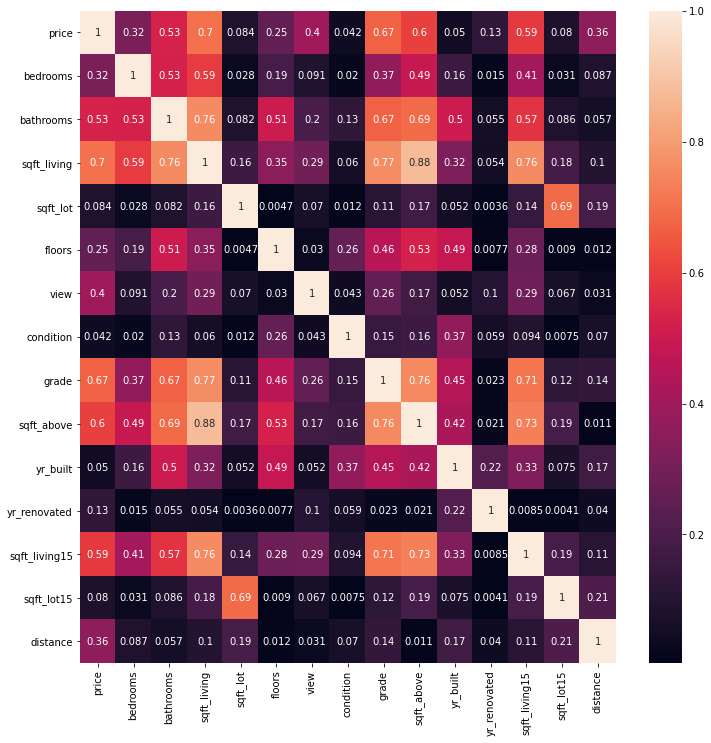

In [50]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_explore.corr().abs(), annot=True)

Heat maps give us a brief look at which independent variables will have multicollinearity issues.

## Modeling

### Simple Model

Model the variable that has the highest correlation with price, which is sqft_living

In [51]:
simple_formula='price ~ sqft_living'
simple_model = ols(simple_formula, df_train).fit()
simple_model_summ = simple_model.summary()
simple_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:42   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.726e+04   5117.509     -9.236      0.000   -5.73e+04   -3.72e+04
sqft_living   283.3842      2.248    126.049      0.000     278.977     287.791
==============================================================================
Omnibus:                    10297.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273144.164
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      22.422   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
simple_train_preds=simple_model.predict(X_train)
simple_test_preds=simple_model.predict(X_test)

In [53]:
print(f"Train R2: {r2_score(y_train, simple_train_preds)}")
print(f"Test R2: {r2_score(y_test, simple_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, simple_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, simple_test_preds, squared = False)}")



Train R2: 0.4952362517108302
Test R2: 0.48516570404881854
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585675


Interpretation: The simple model is a big improvement from the baseline. R2 is 0.50 for training data and 0.49 for testing data and the prediction is off by around 260 thousand dollars on average. The R2 is still low and the RMSE is still too high. Model needs iteration.

### Functions for modeling

#### Since we are doing a lot of assessment of our models, we can use a function for this repetitive work

In [54]:
#subfunction that takes a list of variables and give us a model for these variables
def model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    multi_model = ols(formula, data).fit()
    multi_model_summ = multi_model.summary()
    return multi_model,multi_model_summ

In [55]:
# subfunction that does the assessment of the model
def assess(model):
    
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [56]:
# subfunction that scales the model
def scaled_model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    data_scaled = (data - np.mean(data)) / np.std(data)
    model_scaled = ols(formula, data_scaled).fit()
    model_scaled_summ = model_scaled.summary()
    return model_scaled_summ

In [57]:
# the main function
def model_and_assess(ind_variable,data):
    multi_model, multi_model_summ = model(ind_variable,data)
    assessment = assess(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)   
    print('        ')
    print('This is the summary of the scaled model')
    print('        ')
    print(scaled_summ)        
    print('        ')
    print('This is the correlation table between variables')
    print('        ')
    print(data[ind_variable].corr())    
    print('        ')
    print('This is the residual plot of the model')
    print('        ')
    print(assessment)

Check to see if the function works

Train R2: 0.4952362517108302
Test R2: 0.48516570404881854
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585675
----
Train MAE: 174968.58987369284
Test MAE: 172486.36266115913


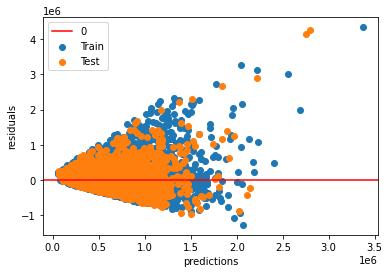

In [58]:
# It works! We get the same result
assess(simple_model)

Train R2: 0.4952362517108302
Test R2: 0.48516570404881854
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585675
----
Train MAE: 174968.58987369284
Test MAE: 172486.36266115913
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:43   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust             

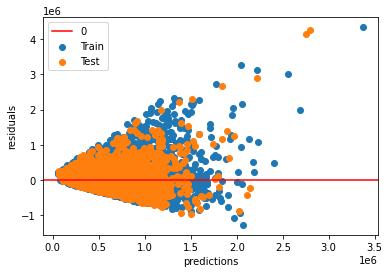

In [59]:
model_and_assess(['sqft_living'],df_explore)

### Two Approaches

- We can approach this model by adding features to the simple regression model (feed forward feature selection) or we can take the kitchen sink approach.

### Feed Forward Feature Selection Approach

### Add in location data

Distance has a very low correlation with sqft_living (0.14) and a negative correlation with price (-0.19), our target.

Train R2: 0.5795067852641895
Test R2: 0.5691394889428398
----
Train RMSE: 239094.43739041538
Test RMSE: 237880.1184545742
----
Train MAE: 155614.89643809258
Test MAE: 153110.75980884544
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:43   Log-Likelihood:            -2.2356e+05
No. Observations:               16196   AIC:                         4.471e+05
Df Residuals:                   16193   BIC:                         4.472e+05
Df Model:                           2                                         
Covariance Type:            nonrobust               

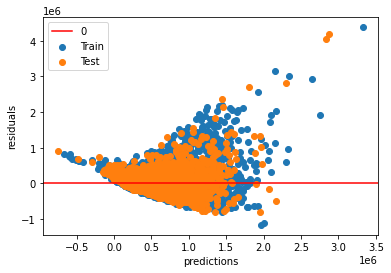

In [60]:
model_and_assess(['sqft_living', 'distance'],df_explore)

Interpretation:
- The sqft_living/distance model is a small improvement from the simple model based only on sqft_living. R2 increased from 0.50 to 0.58 for training data and 0.49 to 0.56 for testing data. The prediction is off by around 237 thousand dollars on average. The R2 is still low and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error seems to be worse for houses at both end of the price spectrum and we need to find a way to account for that

In [61]:
# check to see where the expensive houses (1.5M +) are 
fig_expensive = px.scatter_mapbox(df[df['price']>1500000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_expensive.update_layout(mapbox_style='open-street-map')
fig_expensive.show()

It seems that the most expensive houses are either next to the mountain or next to the water, so let's try taking into account the view column.

Train R2: 0.6205407647185135
Test R2: 0.6133836819081241
----
Train RMSE: 227128.9743180182
Test RMSE: 225335.64171456578
----
Train MAE: 148233.3339294878
Test MAE: 144863.50966238749
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     8826.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:44   Log-Likelihood:            -2.2273e+05
No. Observations:               16196   AIC:                         4.455e+05
Df Residuals:                   16192   BIC:                         4.455e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                

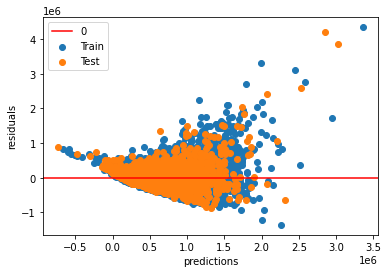

In [62]:
model_and_assess(['sqft_living', 'distance', 'view'], df_explore)

Interpretation:
- The sqft_living/distance model is a small improvement from the simple model based only on sqft_living. R2 increased from 0.58 to 0.61 for training data and 0.56 to 0.60 for testing data. The prediction is off by around 229 thousand dollars on average. The R2 is still relatively low and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.29, acceptable.

#### Check how the condition of houses affects price

Condition has low correlation with existing variables (sqft_living, distance, view) so let's add that in and see what happens.

Train R2: 0.6229581613784398
Test R2: 0.6133686363242927
----
Train RMSE: 226404.34037053157
Test RMSE: 225340.0262595853
----
Train MAE: 147836.46970565192
Test MAE: 144836.57658176846
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     6688.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:45   Log-Likelihood:            -2.2268e+05
No. Observations:               16196   AIC:                         4.454e+05
Df Residuals:                   16191   BIC:                         4.454e+05
Df Model:                           4                                         
Covariance Type:            nonrobust               

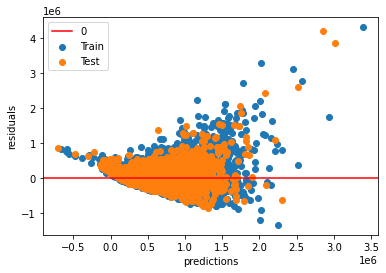

In [63]:
model_and_assess(['sqft_living', 'distance', 'view', 'condition'], df_explore)

Interpretation:
- The model is a tiny improvement from the previous one. R2 increased from 0.611 to 0.614 for training data, but R2 for testing data is basically the same. The R2 is still relatively low and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.29, acceptable.

### Feature Engineering

Now we seems to run out of variables to add without having a collinearity probolem, so we need to start looking into feature engineering.

sqft_living, bedrooms, bathrooms and grade has high correlations with each other as well as our target price, so let's find a way to account for them while adhereing to linear regression assumptions.

In [64]:
# look at out training dataset with these 5 features
df_coll=df_explore[['price','sqft_living', 'bedrooms', 'bathrooms', 'grade']]
df_coll

price  sqft_living  bedrooms  bathrooms  grade
2358    234000.0         1040         3       1.00      7
6405    529000.0         1880         3       2.50      8
937     253000.0         2020         3       2.50      7
19076   745000.0         4720         5       4.00      9
18799   855000.0         2190         4       2.25      8
...          ...          ...       ...        ...    ...
11964   440000.0         2230         3       2.50      7
21577  1090000.0         4170         5       3.75     10
5390    299800.0         1530         4       1.50      6
860     245000.0          380         1       0.75      5
15796   133000.0         1430         5       2.00      6

[16196 rows x 5 columns]

In [65]:
# find correlation between columns
df_coll.corr()

price  sqft_living  bedrooms  bathrooms     grade
price        1.000000     0.703730  0.318156   0.529581  0.669421
sqft_living  0.703730     1.000000  0.594390   0.761228  0.765367
bedrooms     0.318156     0.594390  1.000000   0.528151  0.368958
bathrooms    0.529581     0.761228  0.528151   1.000000  0.669794
grade        0.669421     0.765367  0.368958   0.669794  1.000000

______________________________________________________________________________________________________________________________

There's a high correlation between sqft_living and grade, so let's make a new column called sqft_grade to indicate the square footage of a house weighted by how luxurious it is.

In [66]:
# Add column sqft_grade
X_train['sqft_grade']=X_train['sqft_living']*X_train['grade']
X_test['sqft_grade']=X_test['sqft_living']*X_test['grade']

<ipython-input-66-c48a59884103>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-c48a59884103>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
# Add column sqft_grade in our df_explore as well
df_explore['sqft_grade'] = df_explore['sqft_living'] * df_explore['grade']

Now let's build a model with this new feature instead of sqft_living and see if we get better results

Train R2: 0.6837145064045784
Test R2: 0.6819463623650579
----
Train RMSE: 207362.2100390033
Test RMSE: 204380.74763459628
----
Train MAE: 136387.33637759247
Test MAE: 132834.9782208284
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     8750.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:45   Log-Likelihood:            -2.2126e+05
No. Observations:               16196   AIC:                         4.425e+05
Df Residuals:                   16191   BIC:                         4.426e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                

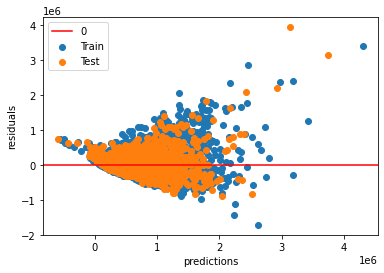

In [68]:
model_and_assess(['sqft_grade', 'distance', 'view', 'condition'], df_explore)

Interpretation:
- The model is a small improvement from the previous one. R2 increased from 0.614 to 0.68 for training data and from 0.60 to 0.68 for the testing data. 
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.30, still acceptable.

### Kitchen Sink Approach

Train R2: 0.6894420719838257
Test R2: 0.6749094309868234
----
Train RMSE: 205476.0868919288
Test RMSE: 206629.3384705669
----
Train MAE: 131424.48234122837
Test MAE: 129187.65662618978
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2763.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:46   Log-Likelihood:            -2.2111e+05
No. Observations:               16196   AIC:                         4.422e+05
Df Residuals:                   16182   BIC:                         4.424e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                

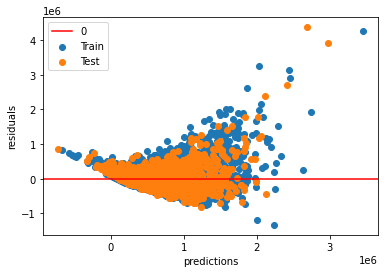

In [69]:
# put all the relevant columns in the model
model_and_assess(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance'], df_explore)

Interpretation: 
- The R2 is pretty high, but the multicollinearity is very high as well.
- The error is not homoskadastic.

### Log Transformation

Since price looks log normally distributed, we want to see if log transforming price would fix our error problem.

In [70]:
y_train_log=np.log(y_train)
y_train_log

2358     12.363076
6405     13.178744
937      12.441145
19076    13.521139
18799    13.658857
           ...    
11964    12.994530
21577    13.901688
5390     12.610871
860      12.409013
15796    11.798104
Name: price, Length: 16196, dtype: float64

In [71]:
df_log_train=pd.concat([y_train_log,X_train],axis=1)
df_log_train

price        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
2358   12.363076   3/25/2015         3       1.00         1040      8122   
6405   13.178744    3/4/2015         3       2.50         1880      4499   
937    12.441145   10/7/2014         3       2.50         2020      6564   
19076  13.521139   1/16/2015         5       4.00         4720    493534   
18799  13.658857   6/18/2014         4       2.25         2190      4080   
...          ...         ...       ...        ...          ...       ...   
11964  12.994530   9/15/2014         3       2.50         2230      5800   
21577  13.901688   3/17/2015         5       3.75         4170      8142   
5390   12.610871   7/21/2014         4       1.50         1530      9000   
860    12.409013   6/20/2014         1       0.75          380     15000   
15796  11.798104  12/20/2014         5       2.00         1430      5600   

       floors waterfront  view  condition  ...  sqft_basement  yr_built  \
2358      1.0         NO     1          5  ...            0.0      1971   
6405      2.0         NO     1          3  ...            0.0      1993   
937       1.0         NO     1          3  ...          710.0      1994   
19076     2.0         NO     1          5  ...          760.0      1975   
18799     2.0         NO     1          3  ...          390.0      1918   
...       ...        ...   ...        ...  ...            ...       ...   
11964     2.0         NO     1          3  ...            0.0      2004   
21577     2.0         NO     3          3  ...            0.0      2006   
5390      1.0         NO     1          4  ...            0.0      1976   
860       1.0         NO     1          3  ...            0.0      1963   
15796     1.5         NO     1          3  ...            0.0      1947   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
2358           0.0    98198  47.3731 -122.312           1470        8676   
6405           0.0    98029  47.5664 -121.999           2130        5114   
937            0.0    98042  47.3545 -122.158           1710        5151   
19076          0.0    98027  47.4536 -122.009           2160      219542   
18799          0.0    98119  47.6425 -122.358           2100        4080   
...            ...      ...      ...      ...            ...         ...   
11964          0.0    98065  47.5308 -121.847           2230        6088   
21577          NaN    98056  47.5354 -122.181           3030        7980   
5390           0.0    98014  47.6492 -121.908           1520        8500   
860            0.0    98168  47.4810 -122.323           1170       15000   
15796          NaN    98118  47.5192 -122.266           1860        5980   

       distance  sqft_grade  
2358   0.261494        7280  
6405   0.207162       15040  
937    0.259275       14140  
19076  0.248090       42480  
18799  0.159819       17520  
...         ...         ...  
11964  0.363261       15610  
21577  0.077462       41700  
5390   0.296093        9180  
860    0.177282        1900  
15796  0.111459        8580  

[16196 rows x 22 columns]

In [72]:
y_test_log=np.log(y_test)
df_log_test=pd.concat([y_test_log,X_test],axis=1)
df_log_test

price       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
3686   11.794338  2/20/2015         3       0.75          850      8573   
10246  12.656989   5/6/2014         3       1.00         1510      6083   
4037   13.110291  3/25/2015         4       2.25         1790     42000   
3437   12.779873  2/17/2015         2       1.50         1140      2500   
19291  13.314635  5/23/2014         3       1.00         1500      3920   
...          ...        ...       ...        ...          ...       ...   
8476   12.745486  4/17/2015         3       1.00         1410     18600   
11717  14.272935  6/23/2014         4       2.50         4570     74487   
13876  12.833347  6/25/2014         3       2.25         1400     11400   
13478  14.100690  3/24/2015         4       2.25         3260      4640   
15372  13.641752  7/15/2014         4       2.25         2290     12174   

       floors waterfront  view  condition  ...  sqft_basement  yr_built  \
3686      1.0         NO     1          3  ...          250.0      1945   
10246     1.0         NO     1          4  ...          650.0      1940   
4037      1.0         NO     1          3  ...          620.0      1983   
3437      1.0         NO     2          3  ...          510.0      1988   
19291     1.0         NO     1          3  ...          500.0      1947   
...       ...        ...   ...        ...  ...            ...       ...   
8476      1.0         NO     1          5  ...            0.0      1960   
11717     2.0         NO     5          5  ...            0.0      1948   
13876     2.0         NO     1          3  ...            0.0      1984   
13478     2.0         NO     1          5  ...          900.0      1907   
15372     1.0        YES     5          3  ...          800.0      1948   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
3686           0.0    98146  47.5030 -122.356            850        8382   
10246          0.0    98115  47.6966 -122.324           1510        5712   
4037           0.0    98045  47.4819 -121.744           2060       50094   
3437           NaN    98106  47.5707 -122.359           1500        5000   
19291          0.0    98107  47.6718 -122.359           1640        4017   
...            ...      ...      ...      ...            ...         ...   
8476           NaN    98059  47.5031 -122.152           1610       24941   
11717       1985.0    98177  47.7282 -122.372           3810       74487   
13876          0.0    98028  47.7428 -122.231           2180        9248   
13478          0.0    98112  47.6272 -122.312           3240        5800   
15372          0.0    98178  47.5114 -122.245           2290        9379   

       distance  sqft_grade  
3686   0.187991        5100  
10246  0.149962        9060  
4037   0.475123       12530  
3437   0.162353        7980  
19291  0.169154       10500  
...         ...         ...  
8476   0.117895        9870  
11717  0.207407       54840  
13876  0.135939       11200  
13478  0.111815       29340  
15372  0.107861       16030  

[5399 rows x 22 columns]

#### Here we added functions that we can use to model data that has undergone log transformations

In [73]:
def assess_log(model):
    
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train_log
    y_te = y_test_log
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [74]:
#modify our function to fit the log transformation
def model_and_assess_log(ind_variable,data):
    multi_model, multi_model_summ = model(ind_variable,data)
    assessment = assess_log(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)
    print('        ')
    print('This is the summary of the scaled model')
    print('        ')
    print(scaled_summ)
    print('        ')
    print('This is the correlation table between variables')
    print('        ')
    print(data[ind_variable].corr())
    print('        ')
    print('This is the residual plot of the model')
    print('        ')
    print(assessment)

Train R2: 0.7275627691092035
Test R2: 0.7178463836462075
----
Train RMSE: 0.27601269052858834
Test RMSE: 0.27573104572801344
----
Train MAE: 0.21615790173732838
Test MAE: 0.21650567824123607
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3324.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:47   Log-Likelihood:                -2131.9
No. Observations:               16196   AIC:                             4292.
Df Residuals:                   16182   BIC:                             4399.
Df Model:                          13                                         
Covariance Type:            nonrobust          

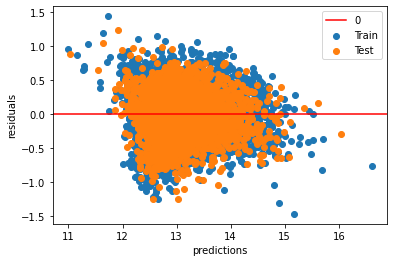

In [75]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance'], df_log_train)

###### Interpretation

- This model gives us our highest R2 score yet with .728

- This model does suffer from multicollinearity 

- The errors are homskedastic in this model


__________________________________________________________________________________________________________________________

In [76]:
df_explore['view_sqft_living'] = df_explore['view'] * df_explore ['sqft_living']

Here we multiply our 'view' and 'sqft_living' columns to create a new feature

In [77]:
# Add interaction variable for view and sqft_living
X_train['view_sqft_living'] = X_train['view'] * X_train['sqft_living']
X_test['view_sqft_living'] = X_test['view'] * X_test['sqft_living']
# Add interaction term for view and sqft_living in df_log_train
df_log_train['view_sqft_living'] = df_log_train['view'] * df_log_train['sqft_living']

<ipython-input-77-689ea17634fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-689ea17634fc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Test the model with our new view_sqft_living variable before log transforming 'price'.

Train R2: 0.7056678354220263
Test R2: 0.7052912906757085
----
Train RMSE: 200036.31166549993
Test RMSE: 196737.10897002314
----
Train MAE: 127330.46424823713
Test MAE: 126555.61691212005
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2771.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:48   Log-Likelihood:            -2.2067e+05
No. Observations:               16196   AIC:                         4.414e+05
Df Residuals:                   16181   BIC:                         4.415e+05
Df Model:                          14                                         
Covariance Type:            nonrobust              

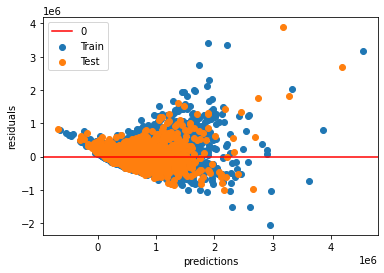

In [78]:
model_and_assess(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance', 'view_sqft_living'], df_explore)

Interpret model

- Our R2 dropped and our model has some multicollinearity

- Errors are not homoskedastic

Here we use the same feature variables but we log transform our price variable

Train R2: 0.7288065302367817
Test R2: 0.7194890581344903
----
Train RMSE: 0.27538192768838127
Test RMSE: 0.27492723267464625
----
Train MAE: 0.21578221942878614
Test MAE: 0.21591842743654513
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     3106.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:48   Log-Likelihood:                -2094.8
No. Observations:               16196   AIC:                             4220.
Df Residuals:                   16181   BIC:                             4335.
Df Model:                          14                                         
Covariance Type:            nonrobust          

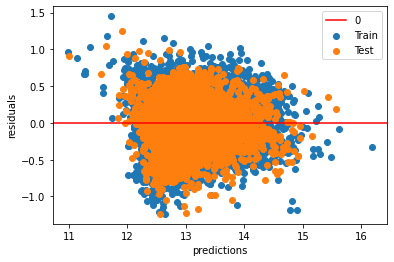

In [79]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance', 'view_sqft_living'], df_log_train)

Interpretation
- Log transforming our target boosted our score to .729

- The errors are homoskedastic

_______________________________________________________________________________________________________________________________

The model below does not have a log transformed target variable and we removed the sqft_above variable 

Train R2: 0.6888814905260847
Test R2: 0.6732620964484114
----
Train RMSE: 205661.45351891287
Test RMSE: 207152.20433476078
----
Train MAE: 131319.3666612564
Test MAE: 129188.33930932907
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:49   Log-Likelihood:            -2.2112e+05
No. Observations:               16196   AIC:                         4.423e+05
Df Residuals:                   16183   BIC:                         4.424e+05
Df Model:                          12                                         
Covariance Type:            nonrobust               

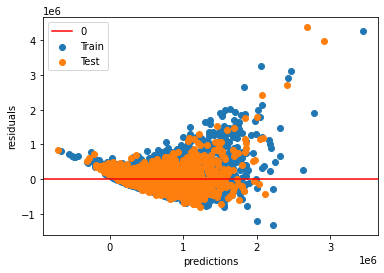

In [80]:
model_and_assess(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance'], df_explore)

Interpretation: 
- Errors are not homoskedastic 

- We can tell that sqft_lot15 is not a significant feature in this model due to the P_value of 0.477

- There is some multicollinearity

-------------------------------------------------------------------------

Then we tried the same model with a log transformed 'price' variable.

Train R2: 0.7273259643543407
Test R2: 0.7176348169203575
----
Train RMSE: 0.27613262076052786
Test RMSE: 0.27583440180759994
----
Train MAE: 0.21622449060090795
Test MAE: 0.21667433185556473
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3597.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:50   Log-Likelihood:                -2138.9
No. Observations:               16196   AIC:                             4304.
Df Residuals:                   16183   BIC:                             4404.
Df Model:                          12                                         
Covariance Type:            nonrobust          

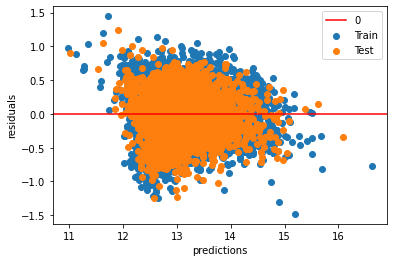

In [81]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance'], df_log_train)

Interpretation
- Log transforming our target seems to result in the errors being homoskedastic and our R2 score going up.
- Multi Collinearity still persists.

_____________________________________________________________________________________________________________

Here we took out 'sqft_living15' and 'sqft_lot15', and we are keeping our target log transformed. 

Train R2: 0.7232309274896778
Test R2: 0.71482512989097
----
Train RMSE: 0.27819838278906056
Test RMSE: 0.27720335588121414
----
Train MAE: 0.21757845941083823
Test MAE: 0.21741062477857923
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     4229.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:39:50   Log-Likelihood:                -2259.6
No. Observations:               16196   AIC:                             4541.
Df Residuals:                   16185   BIC:                             4626.
Df Model:                          10                                         
Covariance Type:            nonrobust            

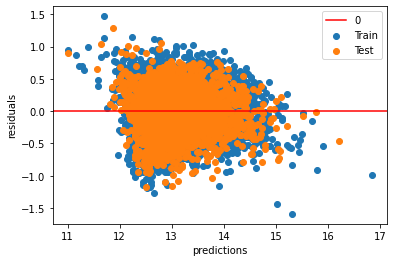

In [82]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'distance'], df_log_train)

Our R2 score dropped by .04 and our errors are still homoskedastic.

In [83]:
(np.exp(0.0754)-1)*100# for bedrooms

# interpretation: for one unit increase in bedroom numbers, the price increase by 7.8% 

7.8315390787216055

here we Interpreted Coefficient for bedrooms

In [84]:
y_train

2358      234000.0
6405      529000.0
937       253000.0
19076     745000.0
18799     855000.0
           ...    
11964     440000.0
21577    1090000.0
5390      299800.0
860       245000.0
15796     133000.0
Name: price, Length: 16196, dtype: float64

To account for the skewness in certain variables, we want to see if log transformation can fix it. 

In [85]:
# Selected the most important variables for pairplot because it would be too big
df_col = list(df.columns)
drop_col = ['yr_renovated', 'date', 'waterfront', 'sqft_basement', 'yr_built', 'zipcode']
df_rcol = list(set(df_col) - set(drop_col))
len(df_col)

21

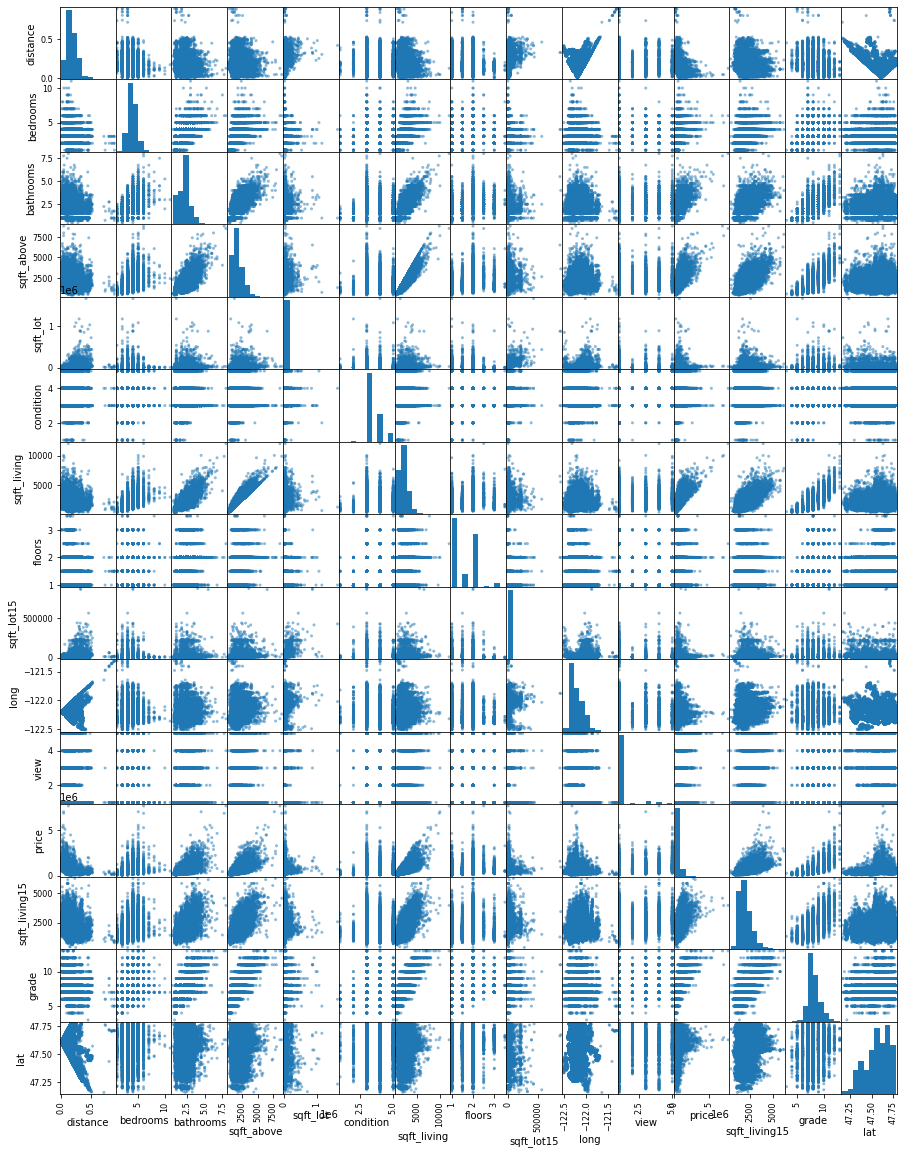

In [86]:
# Distributions of variables
pd.plotting.scatter_matrix(df[df_rcol], figsize=(15,20));

- features that need log transform: bathrooms, sqft_living, sqft_lot, floors, view, condition,sqft_above, yr_built, sqft_living15, sqft_lot15.

In [101]:
# Creating df columns with logged versions of the variable for the ones that need it for X_test
# features that need log transform: bathrooms, sqft_living, sqft_lot*, floors*, view*, condition*,
#sqft_above, yr_built, sqft_living15, sqft_lot15, 

X_train['bathrooms_log'] = X_train['bathrooms'].map(lambda x: np.log(x))
X_train['sqft_living_log'] = X_train['sqft_living'].map(lambda x: np.log(x))
X_train['sqft_lot_log'] = X_train['sqft_lot'].map(lambda x: np.log(x))
X_train['floors_log'] = X_train['floors'].map(lambda x: np.log(x))
X_train['view_log'] = X_train['view'].map(lambda x: np.log(x))
X_train['condition_log'] = X_train['condition'].map(lambda x: np.log(x))
X_train['sqft_above_log'] = X_train['sqft_above'].map(lambda x: np.log(x))
X_train['yr_built_log'] = X_train['yr_built'].map(lambda x: np.log(x))
X_train['sqft_living15_log'] = X_train['sqft_living15'].map(lambda x: np.log(x))
X_train['sqft_lot15_log'] = X_train['sqft_lot15'].map(lambda x: np.log(x))

<ipython-input-101-89fccfa2089d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-89fccfa2089d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-89fccfa2089d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-89f

In [102]:
# Creating df columns with logged versions of the variable for the ones that need it for X_test
# features that need log transform: bathrooms, sqft_living, sqft_lot*, floors*, view*, condition*,
#sqft_above, yr_built, sqft_living15, sqft_lot15, 
X_test['bathrooms_log'] = X_test['bathrooms'].map(lambda x: np.log(x))
X_test['sqft_living_log'] = X_test['sqft_living'].map(lambda x: np.log(x))
X_test['sqft_lot_log'] = X_test['sqft_lot'].map(lambda x: np.log(x))
X_test['floors_log'] = X_test['floors'].map(lambda x: np.log(x))
X_test['view_log'] = X_test['view'].map(lambda x: np.log(x))
X_test['condition_log'] = X_test['condition'].map(lambda x: np.log(x))
X_test['sqft_above_log'] = X_test['sqft_above'].map(lambda x: np.log(x))
X_test['yr_built_log'] = X_test['yr_built'].map(lambda x: np.log(x))
X_test['sqft_living15_log'] = X_test['sqft_living15'].map(lambda x: np.log(x))
X_test['sqft_lot15_log'] = X_test['sqft_lot15'].map(lambda x: np.log(x))

<ipython-input-102-fe25282297e0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-102-fe25282297e0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-102-fe25282297e0>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-102-fe2

In [89]:
X_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'distance', 'sqft_grade',
       'view_sqft_living', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log',
       'floors_log', 'view_log', 'condition_log', 'sqft_above_log',
       'yr_built_log', 'sqft_living15_log', 'sqft_lot15_log'],
      dtype='object')

In [90]:
# make a new df_train that includes these log columns
df_train=pd.concat([y_train, X_train], axis = 1)

In [91]:
df_train.columns

Index(['price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'distance', 'sqft_grade',
       'view_sqft_living', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log',
       'floors_log', 'view_log', 'condition_log', 'sqft_above_log',
       'yr_built_log', 'sqft_living15_log', 'sqft_lot15_log'],
      dtype='object')

In [92]:
# look at the correlation between independent variables and target
df_train.corr()['price'].sort_values(ascending=False)

price                1.000000
sqft_grade           0.756764
sqft_living          0.703730
grade                0.669421
view_sqft_living     0.636329
sqft_living_log      0.615518
sqft_above           0.603381
sqft_living15        0.590540
sqft_living15_log    0.548887
sqft_above_log       0.544320
bathrooms            0.529581
bathrooms_log        0.459973
view                 0.399880
view_log             0.389445
bedrooms             0.318156
lat                  0.303732
floors_log           0.264530
floors               0.254563
sqft_lot_log         0.163451
sqft_lot15_log       0.149032
yr_renovated         0.131064
sqft_lot             0.084421
sqft_lot15           0.080234
yr_built             0.049700
yr_built_log         0.048447
condition_log        0.041768
condition            0.041514
long                 0.020532
zipcode             -0.053939
distance            -0.359506
Name: price, dtype: float64

In [93]:
# select columns 
# drop the ones that are not numeric
df_logged_KS=df_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement'],axis=1)

In [94]:
# check correlations
df_logged_KS.corr()['price'].sort_values(ascending=False)

price                1.000000
sqft_grade           0.756764
sqft_living          0.703730
grade                0.669421
view_sqft_living     0.636329
sqft_living_log      0.615518
sqft_above           0.603381
sqft_living15        0.590540
sqft_living15_log    0.548887
sqft_above_log       0.544320
bathrooms            0.529581
bathrooms_log        0.459973
view                 0.399880
view_log             0.389445
bedrooms             0.318156
floors_log           0.264530
floors               0.254563
sqft_lot_log         0.163451
sqft_lot15_log       0.149032
yr_renovated         0.131064
sqft_lot             0.084421
sqft_lot15           0.080234
yr_built             0.049700
yr_built_log         0.048447
condition_log        0.041768
condition            0.041514
distance            -0.359506
Name: price, dtype: float64

In [95]:
# drop the duplicated columns
df_logged_KS=df_logged_KS[['price','bedrooms', 'grade', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log', 'floors_log', 'view_log',
                      'condition_log', 'sqft_above_log', 'yr_built_log', 'sqft_living15_log', 'sqft_lot15_log', 'distance']]
df_logged_KS

price  bedrooms  grade  bathrooms_log  sqft_living_log  \
2358    234000.0         3      7       0.000000         6.946976   
6405    529000.0         3      8       0.916291         7.539027   
937     253000.0         3      7       0.916291         7.610853   
19076   745000.0         5      9       1.386294         8.459564   
18799   855000.0         4      8       0.810930         7.691657   
...          ...       ...    ...            ...              ...   
11964   440000.0         3      7       0.916291         7.709757   
21577  1090000.0         5     10       1.321756         8.335671   
5390    299800.0         4      6       0.405465         7.333023   
860     245000.0         1      5      -0.287682         5.940171   
15796   133000.0         5      6       0.693147         7.265430   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
2358       9.002332    0.000000  0.000000       1.609438        6.946976   
6405       8.411610    0.693147  0.000000       1.098612        7.539027   
937        8.789355    0.000000  0.000000       1.098612        7.177782   
19076     13.109347    0.693147  0.000000       1.609438        8.283999   
18799      8.313852    0.693147  0.000000       1.098612        7.495542   
...             ...         ...       ...            ...             ...   
11964      8.665613    0.693147  0.000000       1.098612        7.709757   
21577      9.004791    0.693147  1.098612       1.098612        8.335671   
5390       9.104980    0.000000  0.000000       1.386294        7.333023   
860        9.615805    0.000000  0.000000       1.098612        5.940171   
15796      8.630522    0.405465  0.000000       1.098612        7.265430   

       yr_built_log  sqft_living15_log  sqft_lot15_log  distance  
2358       7.586296           7.293018        9.068316  0.261494  
6405       7.597396           7.663877        8.539737  0.207162  
937        7.597898           7.444249        8.546946  0.259275  
19076      7.588324           7.677864       12.299299  0.248090  
18799      7.559038           7.649693        8.313852  0.159819  
...             ...                ...             ...       ...  
11964      7.602900           7.709757        8.714075  0.363261  
21577      7.603898           8.016318        8.984694  0.077462  
5390       7.588830           7.326466        9.047821  0.296093  
860        7.582229           7.064759        9.615805  0.177282  
15796      7.574045           7.528332        8.696176  0.111459  

[16196 rows x 14 columns]

In [96]:
# drop the log values that has low correlations with the price
df_logged_KS=df_logged_KS.drop(['yr_built_log','condition_log'], axis=1)

In [97]:
df_logged_KS

price  bedrooms  grade  bathrooms_log  sqft_living_log  \
2358    234000.0         3      7       0.000000         6.946976   
6405    529000.0         3      8       0.916291         7.539027   
937     253000.0         3      7       0.916291         7.610853   
19076   745000.0         5      9       1.386294         8.459564   
18799   855000.0         4      8       0.810930         7.691657   
...          ...       ...    ...            ...              ...   
11964   440000.0         3      7       0.916291         7.709757   
21577  1090000.0         5     10       1.321756         8.335671   
5390    299800.0         4      6       0.405465         7.333023   
860     245000.0         1      5      -0.287682         5.940171   
15796   133000.0         5      6       0.693147         7.265430   

       sqft_lot_log  floors_log  view_log  sqft_above_log  sqft_living15_log  \
2358       9.002332    0.000000  0.000000        6.946976           7.293018   
6405       8.411610    0.693147  0.000000        7.539027           7.663877   
937        8.789355    0.000000  0.000000        7.177782           7.444249   
19076     13.109347    0.693147  0.000000        8.283999           7.677864   
18799      8.313852    0.693147  0.000000        7.495542           7.649693   
...             ...         ...       ...             ...                ...   
11964      8.665613    0.693147  0.000000        7.709757           7.709757   
21577      9.004791    0.693147  1.098612        8.335671           8.016318   
5390       9.104980    0.000000  0.000000        7.333023           7.326466   
860        9.615805    0.000000  0.000000        5.940171           7.064759   
15796      8.630522    0.405465  0.000000        7.265430           7.528332   

       sqft_lot15_log  distance  
2358         9.068316  0.261494  
6405         8.539737  0.207162  
937          8.546946  0.259275  
19076       12.299299  0.248090  
18799        8.313852  0.159819  
...               ...       ...  
11964        8.714075  0.363261  
21577        8.984694  0.077462  
5390         9.047821  0.296093  
860          9.615805  0.177282  
15796        8.696176  0.111459  

[16196 rows x 12 columns]

In [98]:
# make a list of all the independent variables
list_KS = list(df_logged_KS.columns)
list_KS.remove('price')

In [99]:
list_KS

['bedrooms',
 'grade',
 'bathrooms_log',
 'sqft_living_log',
 'sqft_lot_log',
 'floors_log',
 'view_log',
 'sqft_above_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'distance']

Train R2: 0.6027888831951208
Test R2: 0.5841571535783163
----
Train RMSE: 232381.0305980059
Test RMSE: 233697.68882190718
----
Train MAE: 147142.01613450286
Test MAE: 143539.00538451117
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2233.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:40:24   Log-Likelihood:            -2.2310e+05
No. Observations:               16196   AIC:                         4.462e+05
Df Residuals:                   16184   BIC:                         4.463e+05
Df Model:                          11                                         
Covariance Type:            nonrobust               

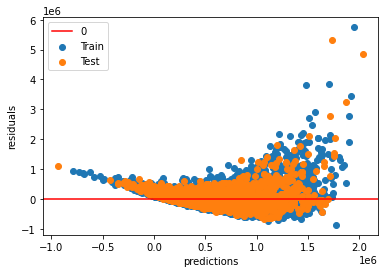

In [100]:
model_and_assess(list_KS,df_logged_KS)

## Recommendations

## Conclusion